In [322]:
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext rpy2.ipython

import subprocess

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### 1.1 Iter comparison

In [394]:
from astropy.table import Table
df = Table.read('GD_results/task5a.tex', format="ascii").to_pandas()
df["iter"] = df["n\_iter"]
df["fun"] = df["function"]
df = df.drop(["n\_iter", "function"], axis=1)
df["pnt"] = df.pnt.astype(str)
df = df.sort_values(["fun", "pnt"])

lvals = df.score
lvals[df.score > 2.4] = 2.2
df["score"] = lvals
df = df.fillna(2.5)

df["pnt_fun"] = "f_" + df.fun.astype(str) + "(" + df.pnt + ")"

/tmp/ipykernel_22710/3856612119.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvals[df.score > 2.4] = 2.2


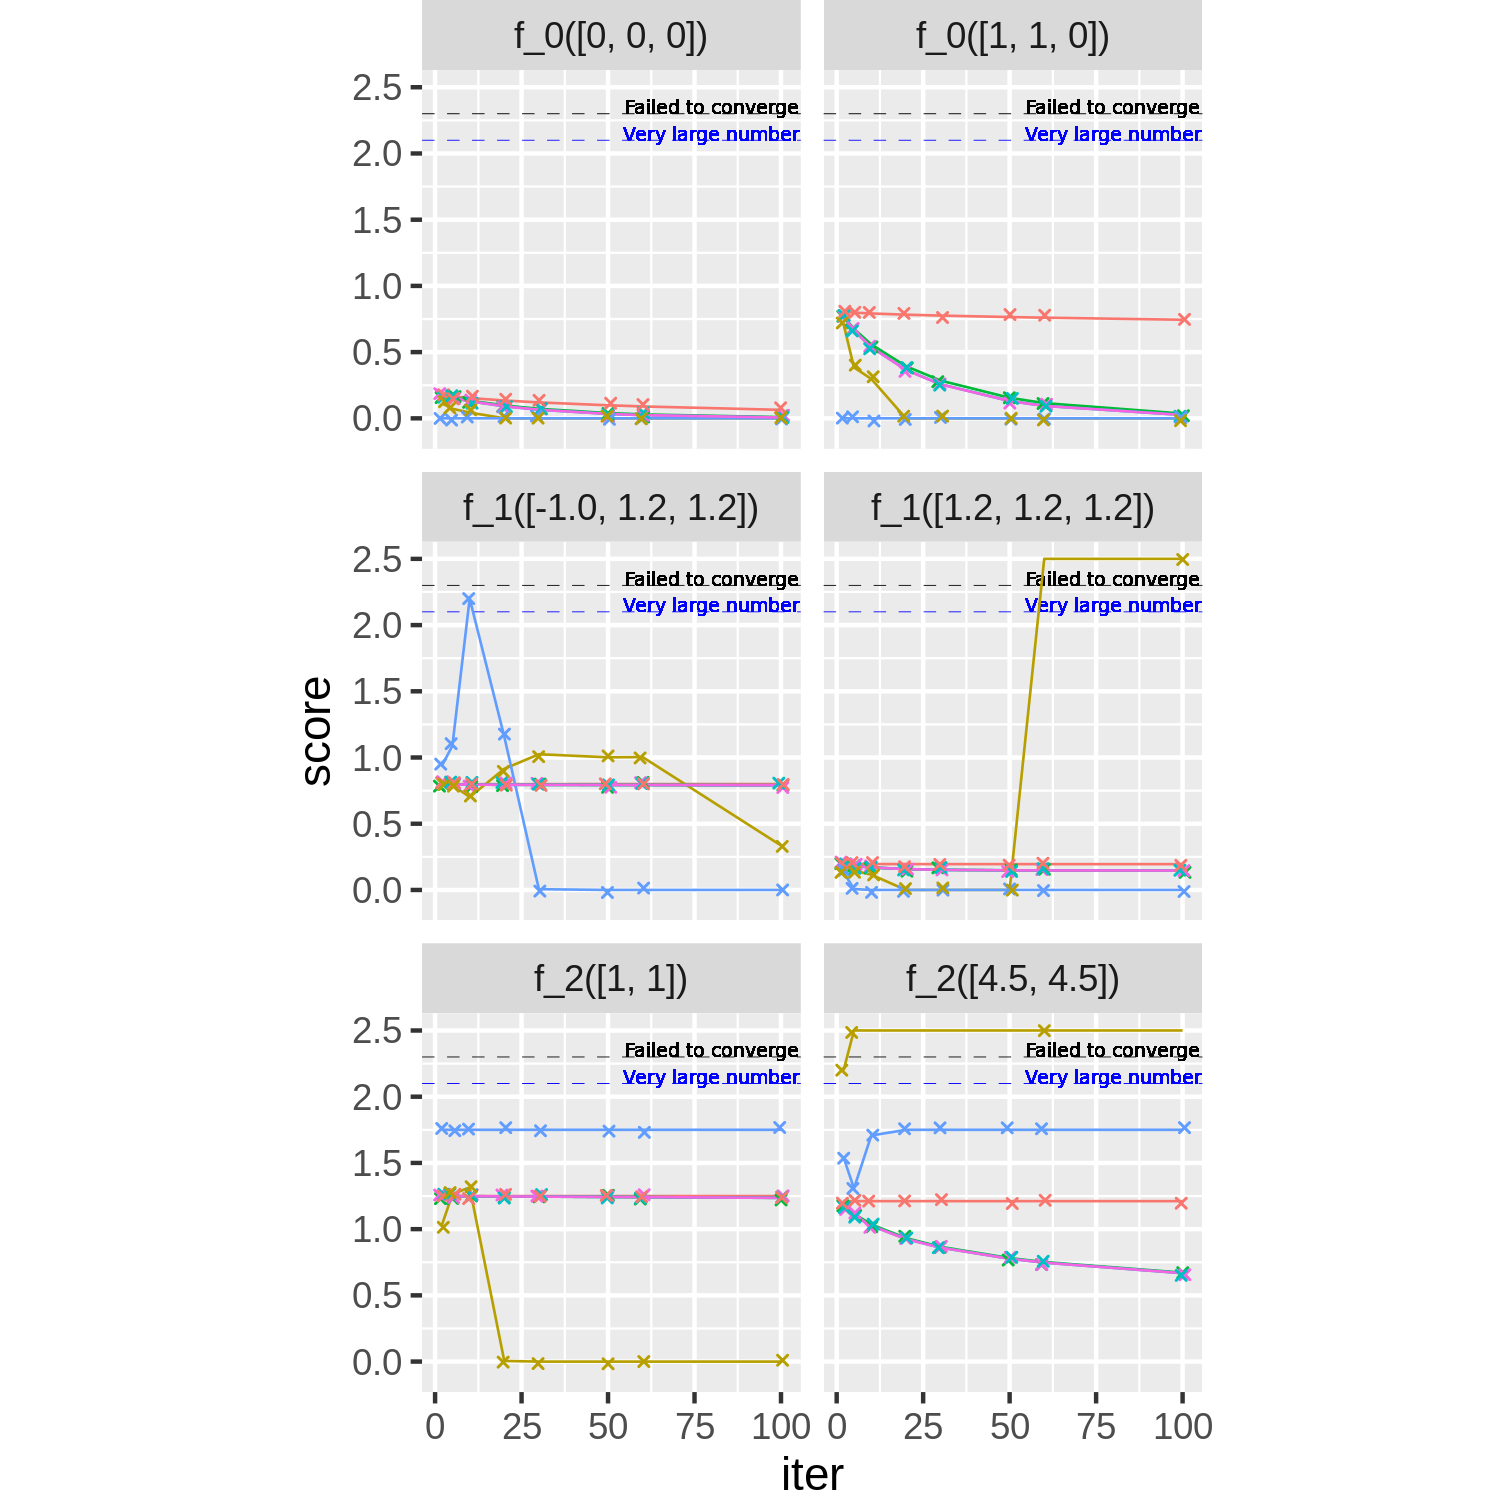

In [395]:
%%R -i df -w 5 -h 5 --units in -r 300
library(ggplot2)
df$pnt_fun <- factor(df$pnt_fun, levels = c("f_0([0, 0, 0])", "f_0([1, 1, 0])", "f_1([-1.0, 1.2, 1.2])", "f_1([1.2, 1.2, 1.2])", "f_2([1, 1])", "f_2([4.5, 4.5])"))
ig <- ggplot(df, aes(x=iter, y=score, color=method)) +
                geom_hline(yintercept=2.3, size=0.1, linetype = "dashed") +
                geom_hline(yintercept=2.1, size=0.1, linetype = "dashed", color="blue") +
                geom_text(aes(x=80, y=2.35, label="Failed to converge"), colour="black", size=1.6, family="Oswald") +
                geom_text(aes(x=80, y=2.15, label="Very large number"), colour="blue", size=1.6, family="Oswald") +
                geom_line(size=0.3) + geom_jitter(height = 0.02, width = 0.8, size=0.8, shape=4) +
                ylim(-0.1, 2.5) + 
                theme(plot.margin = grid::unit(c(0,0,0,0), "mm"),
                      legend.position="none",
                      aspect.ratio = 1,
                      panel.background = element_rect()) +
                facet_wrap(~pnt_fun, ncol = 2)
print(ig)

ggsave("task-1.1.png", width = 4, height = 6, dpi = 300)

### 1.1 Time comparison

In [397]:
from astropy.table import Table
df = Table.read('GD_results/task5b.tex').to_pandas()
df["fun"] = df["function"]
df = df.drop(["function"], axis=1)
df["pnt"] = df.pnt.astype(str)
df = df.sort_values(["fun", "pnt"])

lvals = df.score
lvals[df.score > 2.4] = 2.2
df["score"] = lvals
df = df.fillna(2.5)

df["pnt_fun"] = "f_" + df.fun.astype(str) + "(" + df.pnt + ")"

/tmp/ipykernel_22710/4242801582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvals[df.score > 2.4] = 2.2


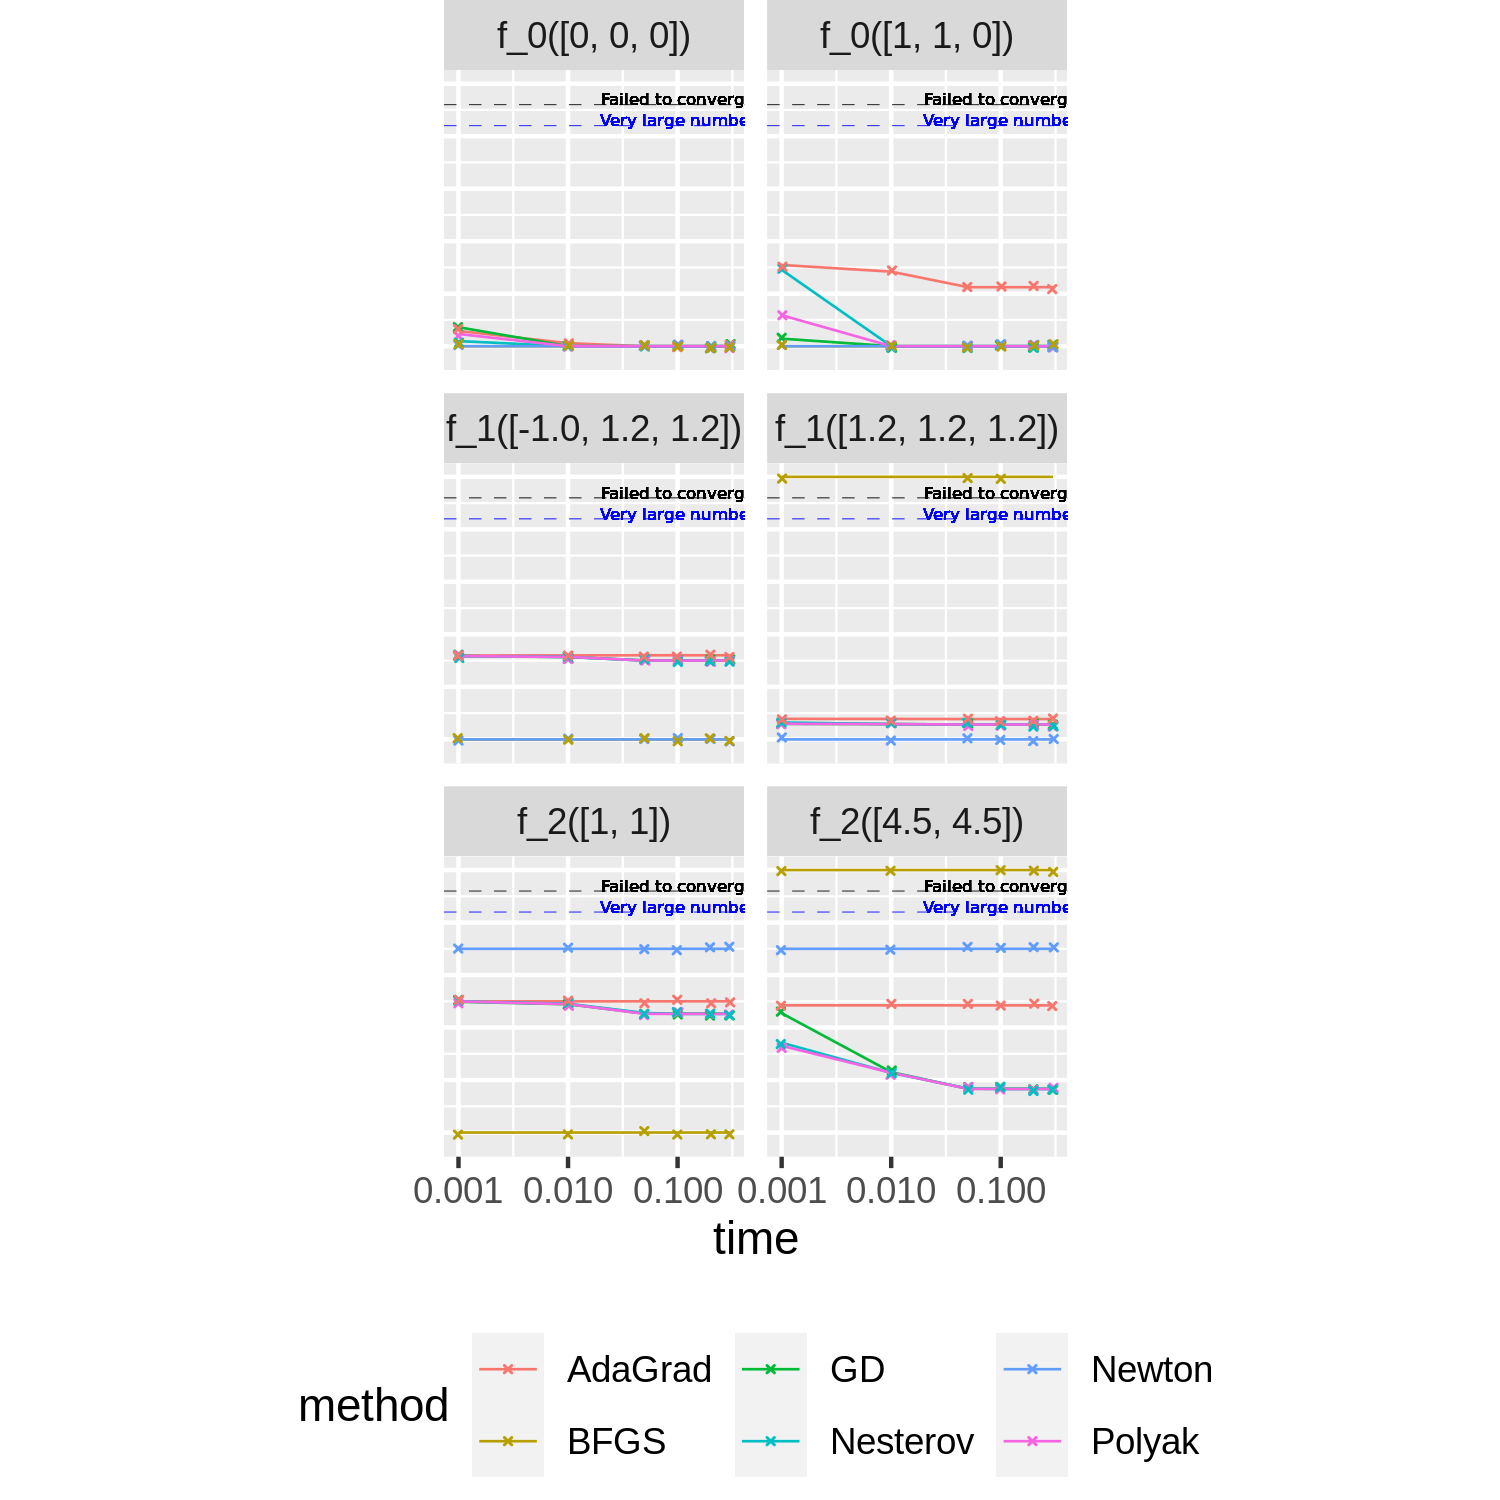

In [399]:
%%R -i df -w 5 -h 5 --units in -r 300
library(ggplot2)
df$pnt_fun <- factor(df$pnt_fun, levels = c("f_0([0, 0, 0])", "f_0([1, 1, 0])", "f_1([-1.0, 1.2, 1.2])", "f_1([1.2, 1.2, 1.2])", "f_2([1, 1])", "f_2([4.5, 4.5])"))
tg <- ggplot(df, aes(x=time, y=score, color=method)) +
                geom_hline(yintercept=2.3, size=0.1, linetype = "dashed") +
                geom_hline(yintercept=2.1, size=0.1, linetype = "dashed", color="blue") +
                geom_text(aes(x=0.1, y=2.35, label="Failed to converge"), colour="black", size=1.4, family="Luminari") +
                geom_text(aes(x=0.1, y=2.15, label="Very large number"), colour="blue", size=1.4, family="Luminari") +
                geom_line(size=0.3) + 
                geom_jitter(height = 0.02, width = 0.008, size=0.5, shape=4) +
                ylim(-0.1, 2.5) + 
                theme(plot.margin = margin(0,0,0,0, "mm"),
                      legend.position="bottom",
                      aspect.ratio = 1,
                      axis.title.y=element_blank(),
                      axis.text.y=element_blank(),
                      axis.ticks.y=element_blank()) +
                scale_x_log10() + 
                facet_wrap(~pnt_fun, ncol=2)
print(tg)

ggsave("task-1.2.png", width = 4, height = 6, dpi = 300)